# Introduction to Supervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 15)

In [40]:
import numpy as np
import matplotlib.pyplot as plt

The iris data set we used previously actually consists of data from 3 distinct flower species.

Load the data set again. What are the names of the three species, and how many samples of each are there?

In [46]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])
print(iris.target_names)

df ['species'] = iris.target
df ['species_name'] = iris.target_names[df['species']]

print(df['species_name'].value_counts())



.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Make a pair plot of the iris features colored by their true classification.

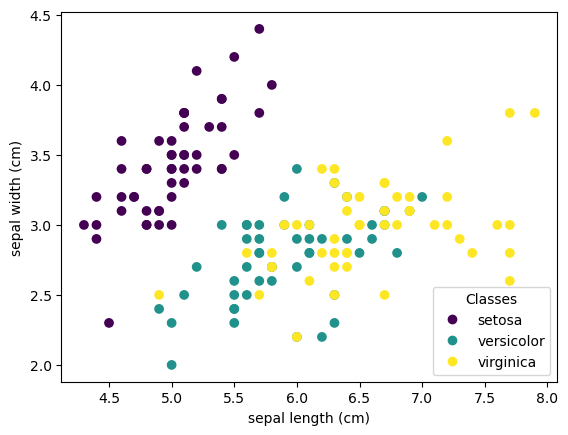

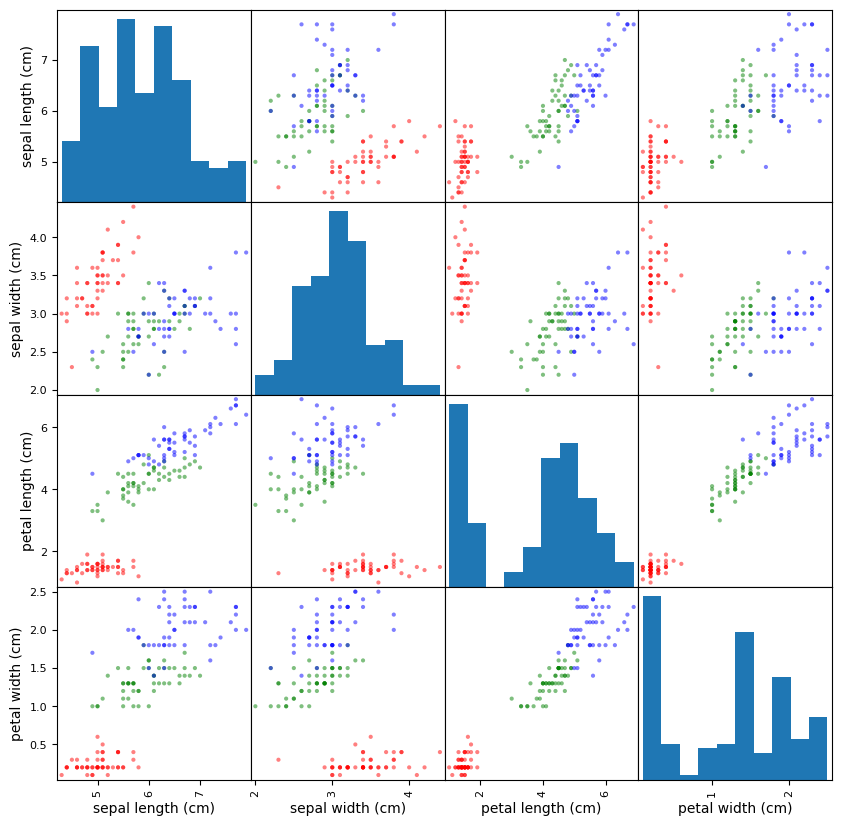

In [50]:
# plot
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")


import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = iris.target_names[df['species']]

# Assign color 
colors = []
for name in df['species_name']:
    if name == 'setosa':
        colors.append('red')
    elif name == 'versicolor':
        colors.append('green')
    else:
        colors.append('blue')

# Plot pair plot
scatter_matrix(df[iris.feature_names], figsize=(10, 10), color=colors)
plt.show()


Fit two different $K$ nearest neighbors (KNN) models to the iris data, one with 3 neighbors and one with 10 neighbors. Repeat the pair plot colored by the predicted classifications. How do the results compare to the true classifications?

In this case you're training and testing your model using the same data set. Is that a good idea?

*Hint that isn't essential, but is worth thinking about - should the features be re-scaled in any way?*

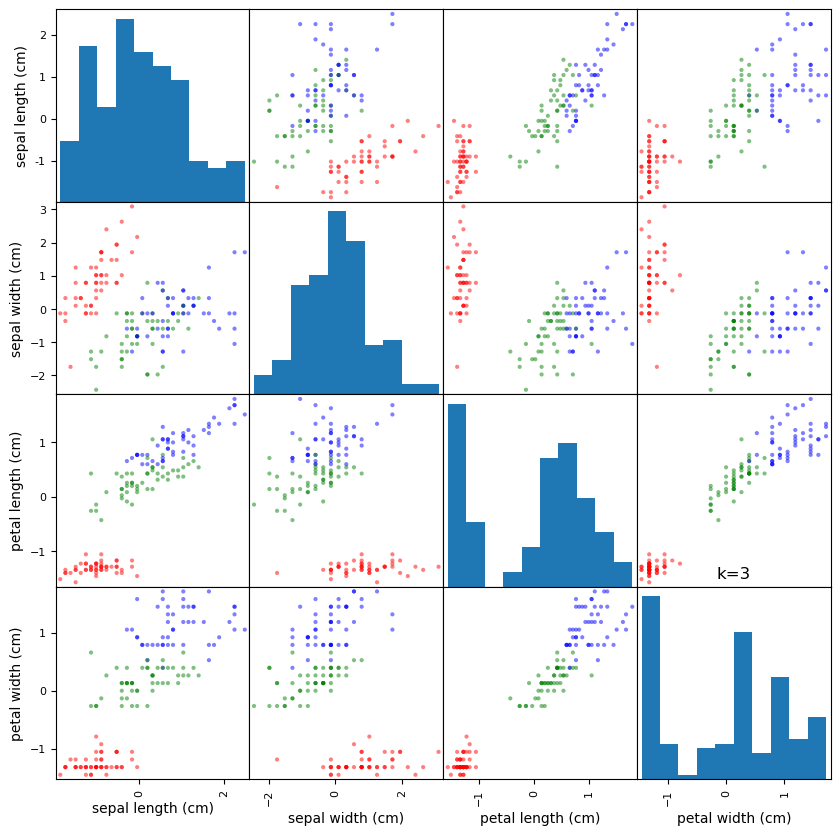

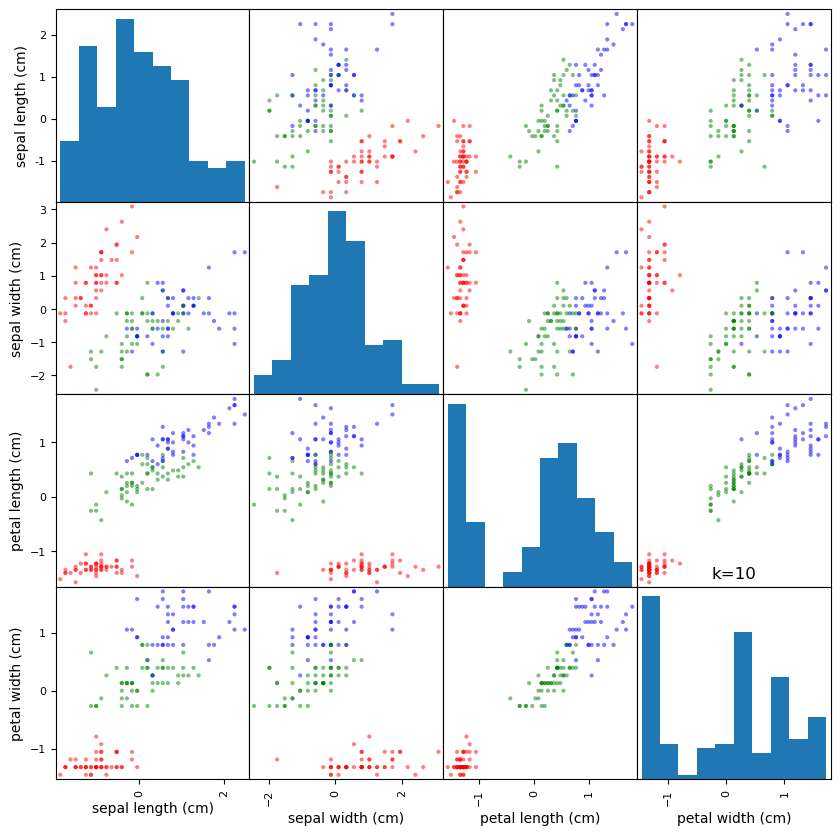

In [61]:
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris.data)
df_scaled = pd.DataFrame(scaled_features, columns=iris.feature_names)

# KNN with 3 neighbors
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(scaled_features, iris.target)
pred3 = knn3.predict(scaled_features)

# KNN with 10 neighbors
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(scaled_features, iris.target)
pred10 = knn10.predict(scaled_features)

df_scaled['pred3'] = pred3
df_scaled['pred10'] = pred10

# Plot predictions for k=3
colors3 = ['red' if p == 0 else 'green' if p == 1 else 'blue' for p in df_scaled['pred3']]
scatter_matrix(df_scaled[iris.feature_names], figsize=(10, 10), color=colors3)
plt.title("k=3")
plt.show()

# Plot predictions for k=10
colors10 = ['red' if p == 0 else 'green' if p == 1 else 'blue' for p in df_scaled['pred10']]
scatter_matrix(df_scaled[iris.feature_names], figsize=(10, 10), color=colors10)
plt.title("k=10")
plt.show()


*Complete*
Most points are grouped into their true classes correctly. 
I think that training and testing the model using the same data set is not a good idea because it can lead to overfitting.
The features should be re-scaled because KNN is sensitive to feature scale.

Produce cross-validation predictions for the iris dataset and a KNN with 5 neighbors. Plot the resulting classifications, as above, and estimate the accuracy of the model as applied to new data. How does this accuracy compare to a KNN with 50 neighbors?

*Hint - read the docs for [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)*

Accuracy k=5: 0.9733333333333334


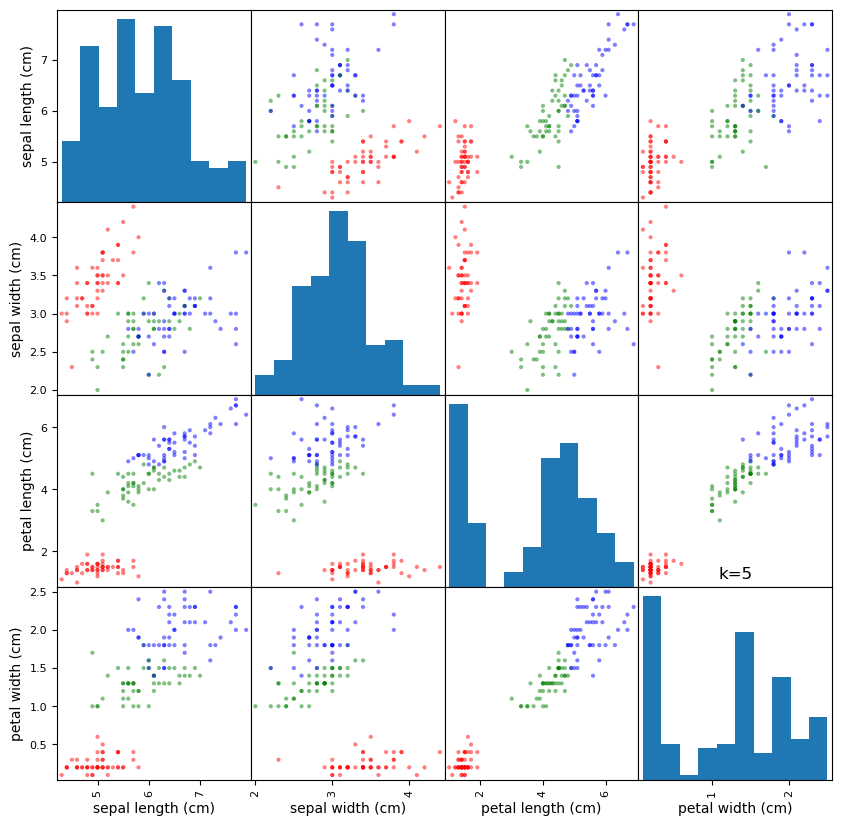

Accuracy k=50: 0.9133333333333333


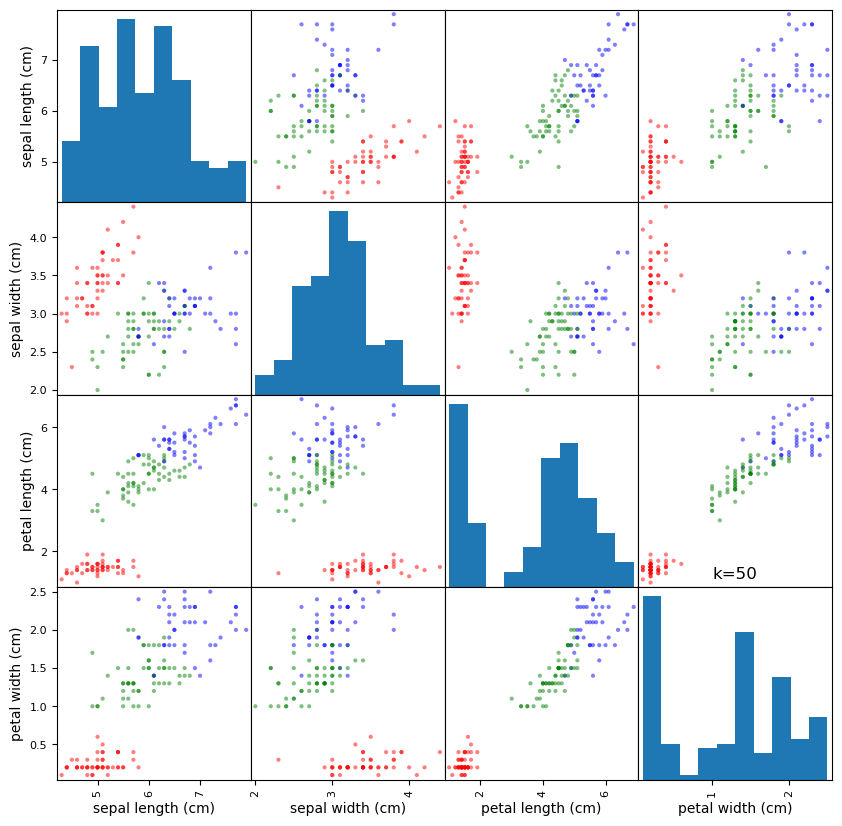

In [66]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# Load iris data

X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)

# KNN with 5 neighbors
knn5 = KNeighborsClassifier(n_neighbors=5)
pred5 = cross_val_predict(knn5, X, y, cv=5)
acc5 = accuracy_score(y, pred5)
print("Accuracy k=5:", acc5)
df['pred5'] = pred5

colors5 = ['red' if p == 0 else 'green' if p == 1 else 'blue' for p in df['pred5']]
pd.plotting.scatter_matrix(df[feature_names], figsize=(10, 10), color=colors5)
plt.title('k=5')
plt.show()

# KNN with 50 neighbors
knn50 = KNeighborsClassifier(n_neighbors=50)
pred50 = cross_val_predict(knn50, X, y, cv=5)
acc50 = accuracy_score(y, pred50)
print("Accuracy k=50:", acc50)
df['pred50'] = pred50

colors50 = ['red' if p == 0 else 'green' if p == 1 else 'blue' for p in df['pred50']]
pd.plotting.scatter_matrix(df[feature_names], figsize=(10, 10), color=colors50)
plt.title('k=50')
plt.show()

While it is useful to understand the overall accuracy of the model, it is even more useful to understand the nature of the misclassifications that occur. Calculate the completeness and purity for each class in the iris set, as determined via cross validation for the $K = 50$ model. Do your numbers make sense? Use the plot above to explain.

In [81]:
from sklearn.metrics import precision_score, recall_score

knn50 = KNeighborsClassifier(n_neighbors=50)
y_pred50 = cross_val_predict(knn50, X, y, cv=5)

# Calculate completeness and purity
precision = precision_score(y, y_pred50, average=None)
recall = recall_score(y, y_pred50, average=None)

# Print
for i in range(len(iris.target_names)):
    print(f"{iris.target_names[i]}:")
    print(f"  Purity: {precision[i]:.2f}")
    print(f"  Completeness: {recall[i]:.2f}")

setosa:
  Purity: 1.00
  Completeness: 1.00
versicolor:
  Purity: 0.82
  Completeness: 0.94
virginica:
  Purity: 0.93
  Completeness: 0.80


*Complete*
These numbers make sense. As we can see in the plots, versicolor and virginica overlap more in feature space while setosa is not.

In addition to knowing the completeness and purity for the individual classes, it is also useful to know class predictions for the misclassified sources, or in other words where there is "confusion" for the classifier.

Calculate the confusion matrix for the iris training set and the $K = 50$ model using `sklearn.metrics.confusion_matrix`. Plot three versions of the matrix: (1) the unnormalized matrix, (2) the matrix normalized by rows, and (3) the matrix normalized by columns. Make sure to label your axes and give each plot a title. Which plot(s) is/are most useful, and why?

*Hint - you might find the [`sklearn` confusion matrix tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py) helpful for making a nice plot.*

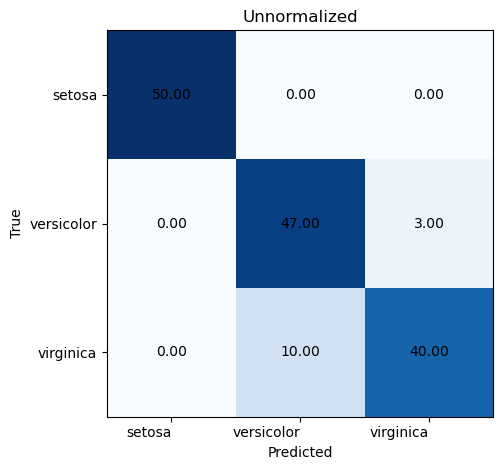

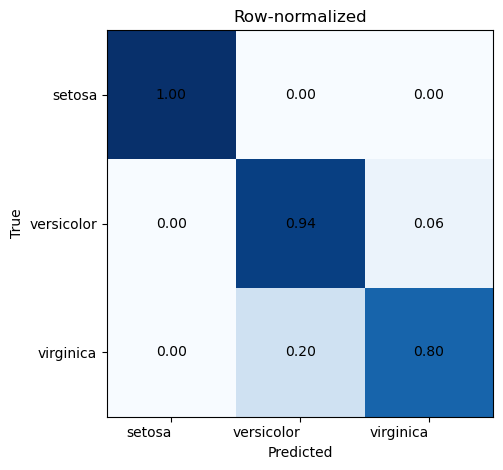

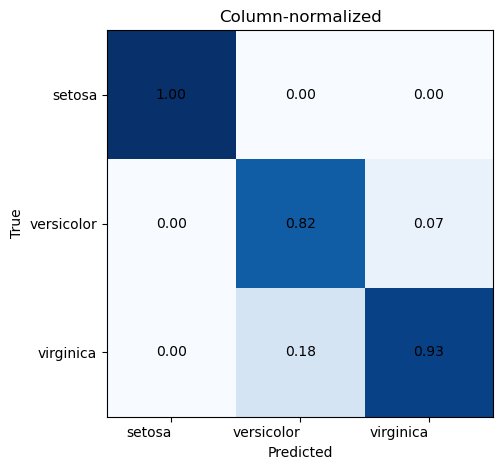

In [91]:
from sklearn.metrics import confusion_matrix

labels = iris.target_names

# Compute confusion matrices
cm_raw = confusion_matrix(y, y_pred50)
cm_row = confusion_matrix(y, y_pred50, normalize='true')
cm_col = confusion_matrix(y, y_pred50, normalize='pred')

# Plot
def plot_cm(cm, title):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap='Blues')

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.setp(ax.get_xticklabels(), ha="right")

    for i in range(len(labels)):
        for j in range(len(labels)):
            value = cm[i, j]
            if cm.dtype == int:
                ax.text(j, i, f"{value:.2f}", ha="center", va="center", color="black")
            else:
                ax.text(j, i, f"{value:.2f}", ha="center", va="center", color="black")

    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

plot_cm(cm_raw, "Unnormalized")
plot_cm(cm_row, "Row-normalized")
plot_cm(cm_col, "Column-normalized")

*Complete*
Row-normarized is most useful because it shows how well the model finds each true class. Column-normarized shows how accurate the predictions are for each class while unnormarized shows raw numbers and hard to compare between classes.